In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy
# Import the requests library.
import requests
# Import the API key.
from config import weather_api_key
# Import the datetime module from the datetime library.
from datetime import datetime

In [11]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs 

In [12]:
# Create a list for holding the cities.
cities = []

# Identify the nearest city for each latitude and longitude combination.
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count.
len(cities)

605

In [13]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key 
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=2828625f0894ee58534b93858c2c736d


In [14]:
# Create an empty list to hold the weather data.
city_data = []

# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city
    
    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")

    # Add 1 to the record count.
    record_count += 1

# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()

        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')

        # Append the city information into city_data list.
        city_data.append({"City": city.title(), 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date
                         })

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete. 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

set_count = 1

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | rikitea
Processing Record 2 of Set 1 | avarua
Processing Record 3 of Set 1 | chicama
Processing Record 4 of Set 1 | khatanga
Processing Record 5 of Set 1 | ushuaia
Processing Record 6 of Set 1 | nizhneyansk
City not found. Skipping...
Processing Record 7 of Set 1 | butaritari
Processing Record 8 of Set 1 | hovd
Processing Record 9 of Set 1 | east london
Processing Record 10 of Set 1 | punta arenas
Processing Record 11 of Set 1 | cap malheureux
Processing Record 12 of Set 1 | sakakah
City not found. Skipping...
Processing Record 13 of Set 1 | svolvaer
Processing Record 14 of Set 1 | cabo san lucas
Processing Record 15 of Set 1 | ribeira grande
Processing Record 16 of Set 1 | albany
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | marsh harbour
Processing Record 19 of Set 1 | buariki
City not found. Skipping...
Processing Record 20 of Set 1 | kodiak
Processing Record 

Processing Record 36 of Set 4 | esil
Processing Record 37 of Set 4 | camopi
Processing Record 38 of Set 4 | manta
Processing Record 39 of Set 4 | biltine
Processing Record 40 of Set 4 | egvekinot
Processing Record 41 of Set 4 | ostrovnoy
Processing Record 42 of Set 4 | langham
Processing Record 43 of Set 4 | berlevag
Processing Record 44 of Set 4 | coolum beach
Processing Record 45 of Set 4 | caravelas
Processing Record 46 of Set 4 | nome
Processing Record 47 of Set 4 | georgetown
Processing Record 48 of Set 4 | ambilobe
Processing Record 49 of Set 4 | nishihara
Processing Record 50 of Set 4 | porbandar
Processing Record 1 of Set 5 | attawapiskat
City not found. Skipping...
Processing Record 2 of Set 5 | chapais
Processing Record 3 of Set 5 | kirakira
Processing Record 4 of Set 5 | bethel
Processing Record 5 of Set 5 | verbivka
Processing Record 6 of Set 5 | petropavlovsk-kamchatskiy
Processing Record 7 of Set 5 | gamba
Processing Record 8 of Set 5 | cidreira
Processing Record 9 of Set

Processing Record 30 of Set 8 | zenzeli
Processing Record 31 of Set 8 | rocha
Processing Record 32 of Set 8 | beira
Processing Record 33 of Set 8 | baykit
Processing Record 34 of Set 8 | dudinka
Processing Record 35 of Set 8 | port hedland
Processing Record 36 of Set 8 | krasnyy chikoy
Processing Record 37 of Set 8 | yatou
Processing Record 38 of Set 8 | cam ranh
Processing Record 39 of Set 8 | mutsu
Processing Record 40 of Set 8 | tigre
Processing Record 41 of Set 8 | sioux lookout
Processing Record 42 of Set 8 | one hundred mile house
City not found. Skipping...
Processing Record 43 of Set 8 | fremont
Processing Record 44 of Set 8 | aksu
Processing Record 45 of Set 8 | lavello
Processing Record 46 of Set 8 | dogondoutchi
Processing Record 47 of Set 8 | yar-sale
Processing Record 48 of Set 8 | marechal candido rondon
Processing Record 49 of Set 8 | dickinson
Processing Record 50 of Set 8 | voh
Processing Record 1 of Set 9 | araouane
Processing Record 2 of Set 9 | yamada
Processing Rec

City not found. Skipping...
Processing Record 16 of Set 12 | siverek
Processing Record 17 of Set 12 | kuryk
Processing Record 18 of Set 12 | iquitos
Processing Record 19 of Set 12 | astaneh-ye ashrafiyeh
Processing Record 20 of Set 12 | anadyr
Processing Record 21 of Set 12 | quelimane
Processing Record 22 of Set 12 | kiunga
Processing Record 23 of Set 12 | bamnet narong
Processing Record 24 of Set 12 | talaya
Processing Record 25 of Set 12 | kaeo
Processing Record 26 of Set 12 | council bluffs
Processing Record 27 of Set 12 | ossora
Processing Record 28 of Set 12 | auchi
Processing Record 29 of Set 12 | kudahuvadhoo
Processing Record 30 of Set 12 | koshurnikovo
Processing Record 31 of Set 12 | saint-joseph
Processing Record 32 of Set 12 | sumbawa
City not found. Skipping...
Processing Record 33 of Set 12 | we
City not found. Skipping...
Processing Record 34 of Set 12 | azimur
City not found. Skipping...
Processing Record 35 of Set 12 | leh
Processing Record 36 of Set 12 | sept-iles
Pr

In [16]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rikitea,-23.12,-134.97,70.39,73,94,15.19,PF,2019-10-21 03:11:20
1,Avarua,-21.21,-159.78,77.00,83,0,14.99,CK,2019-10-21 03:11:21
2,Chicama,-7.84,-79.15,62.60,82,75,12.75,PE,2019-10-21 03:11:21
3,Khatanga,71.98,102.47,19.63,94,100,15.21,RU,2019-10-21 03:11:21
4,Ushuaia,-54.81,-68.31,42.80,70,0,4.21,AR,2019-10-21 03:02:24
5,Butaritari,3.07,172.79,85.35,67,46,10.40,KI,2019-10-21 03:11:22
6,Hovd,63.83,10.70,43.00,93,75,5.82,NO,2019-10-21 03:11:22
7,East London,-33.02,27.91,60.04,77,93,8.77,ZA,2019-10-21 03:11:23
8,Punta Arenas,-53.16,-70.91,42.80,70,0,17.22,CL,2019-10-21 03:11:23
9,Cap Malheureux,-19.98,57.61,72.00,94,90,6.93,MU,2019-10-21 03:11:23


In [17]:
correct_order = ['City', 'Country', 'Date', 'Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

In [18]:
city_data_df = city_data_df[correct_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Rikitea,PF,2019-10-21 03:11:20,-23.12,-134.97,70.39,73,94,15.19
1,Avarua,CK,2019-10-21 03:11:21,-21.21,-159.78,77.00,83,0,14.99
2,Chicama,PE,2019-10-21 03:11:21,-7.84,-79.15,62.60,82,75,12.75
3,Khatanga,RU,2019-10-21 03:11:21,71.98,102.47,19.63,94,100,15.21
4,Ushuaia,AR,2019-10-21 03:02:24,-54.81,-68.31,42.80,70,0,4.21
...,...,...,...,...,...,...,...,...,...
547,Lujan,AR,2019-10-21 03:15:21,-46.57,-67.67,57.72,38,100,20.58
548,Nampula,MZ,2019-10-21 03:15:21,-15.12,39.26,69.80,94,20,9.17
549,Baculin,PH,2019-10-21 03:15:21,7.45,126.58,81.98,73,54,5.28
550,Amontada,BR,2019-10-21 03:15:22,-3.36,-39.83,74.37,88,84,5.48


In [19]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [20]:
# Extract relevant fields from the DataFrame for plotting. 
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

In [26]:
# Import the time module.
import time 
# Get today's date in seconds. 
today = time.strftime('%x')
today

'10/20/19'

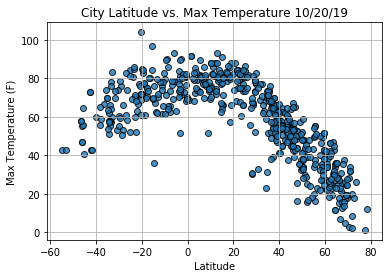

In [27]:
# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats, 
            max_temps,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

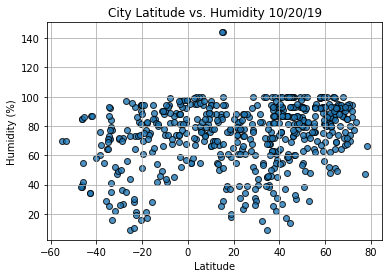

In [29]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats, 
            humidity,
            edgecolor="black", linewidths=1, marker="o", 
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig2.png")

# Show plot.
plt.show()